In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [4]:
playstore_df = pd.read_csv("googleplaystore.csv")

In [5]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [16]:
#handling the missing value with simle imputer 

from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')
playstore_df['Rating'] = median_imputer.fit_transform(playstore_df[['Rating']])


playstore_df['Type'] = playstore_df['Type'].fillna('Free')
playstore_df['Content Rating'] = playstore_df['Content Rating'].fillna('Everyone')
playstore_df = playstore_df.drop(columns=['Current Ver', 'Android Ver'])




In [34]:
playstore_df.drop_duplicates(inplace=True)

# Data shape after removing duplicates
print("Dataset Shape after removing duplicates:", playstore_df.shape)

Dataset Shape after removing duplicates: (10358, 16)


In [17]:

playstore_df.describe()

,Rating
count,10841.000000
mean,4.207841
std,0.500893
min,1.000000
25%,4.100000
50%,4.300000
75%,4.500000
max,19.000000


In [20]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


In [21]:
playstore_df.shape

(10841, 11)

In [22]:
# Get unique categories
unique_categories = playstore_df['Category'].unique()
print(unique_categories)


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


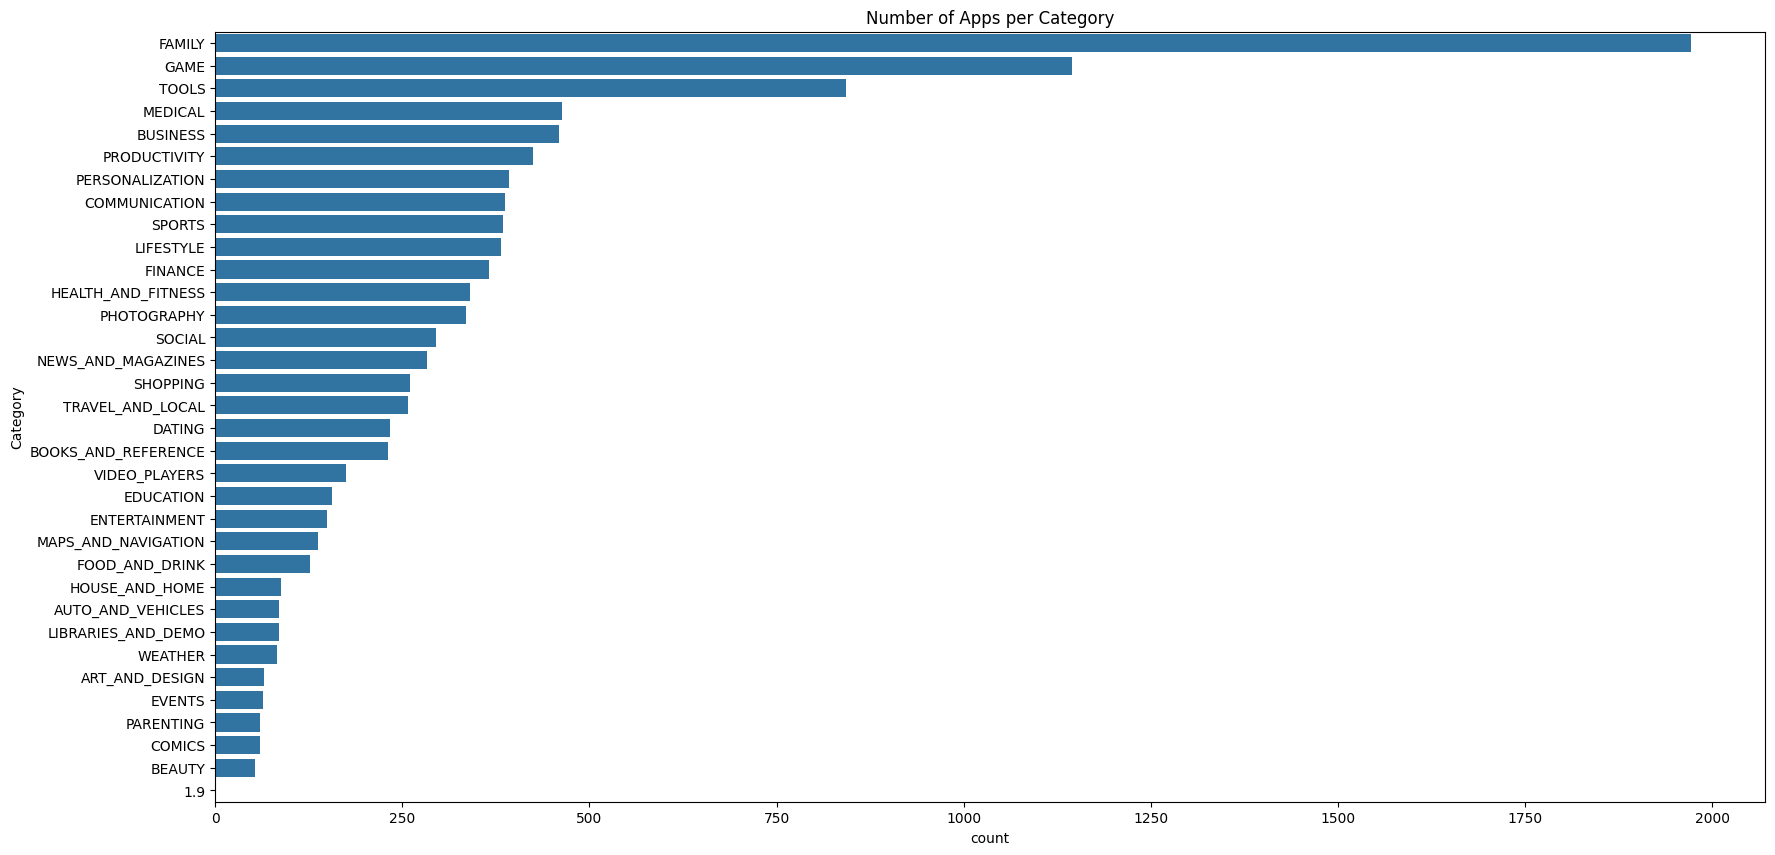

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(y='Category', data=playstore_df, order=playstore_df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.show()

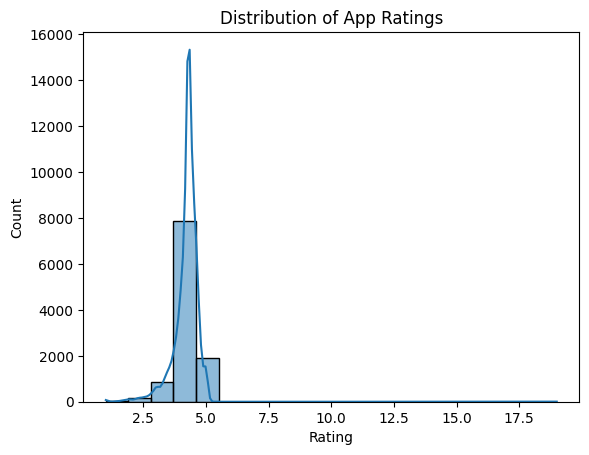

In [19]:
sns.histplot(playstore_df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

# feature engineering

In [23]:
# 1. Encode 'Type' (Free / Paid) to binary

playstore_df['Is_Paid'] = playstore_df['Type'].apply(lambda x: 1 if x == 'Paid' else 0)


In [24]:
# 2. Convert 'Installs' to numeric

playstore_df['Installs'] = playstore_df['Installs'].str.replace('[+,]', '', regex=True)
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'], errors='coerce')

In [25]:
# 3. Extract price as numeric
# Remove '$' sign and convert

playstore_df['Price'] = playstore_df['Price'].str.replace('$', '', regex=False)
playstore_df['Price'] = pd.to_numeric(playstore_df['Price'], errors='coerce')

In [26]:
# 5. Encode 'Content Rating' using one-hot encoding or label encoding

playstore_df = pd.get_dummies(playstore_df, columns=['Content Rating'], drop_first=True)


In [27]:
# 6. Reviews as numeric
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'], errors='coerce')


In [28]:
print(playstore_df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price                     Genres  \
0     159.0   19M     10000.0  Free    0.0               Art & Design   
1     967.0   14M    500000.0  Free    0.0  Art & Design;Pretend Play   
2   87510.0  8.7M   5000000.0  Free    0.0               Art & Design   
3  215644.0   25M  50000000.0  Free    0.0               Art & Design   
4     967.0  2.8M    100000.0  Free    0.0    Art & Design;Creativity   

       Last Updated  Is_Paid  Content Rating_Everyone  \
0   January 7, 2018    

# Eda and featue engineering for the playstore_user_review data

In [31]:
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [32]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
